Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -686.475171  -2283.080916    125.333789   -686.475171   
1   2012-08-26   -678.372660  -2420.007376   -168.336303   -678.372660   
2   2012-08-27   -670.270149   -807.266201   1511.868258   -670.270149   
3   2012-08-28   -662.167638   -760.465880   1670.172514   -662.167638   
4   2012-08-29   -654.065127   -711.460528   1610.864209   -654.065127   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16243.879057  15268.233451  17879.064559  15874.440825   
971 2015-04-23  16271.394404  15067.903793  17605.785536  15899.262325   
972 2015-04-24  16298.909751  14902.945253  17439.389326  15923.845444   
973 2015-04-25  16326.425097  13766.641358  16244.274145  15948.300446   
974 2015-04-26  16353.940444  13583.722701  16025.517291  15972.755448   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -686.475171     -422.261

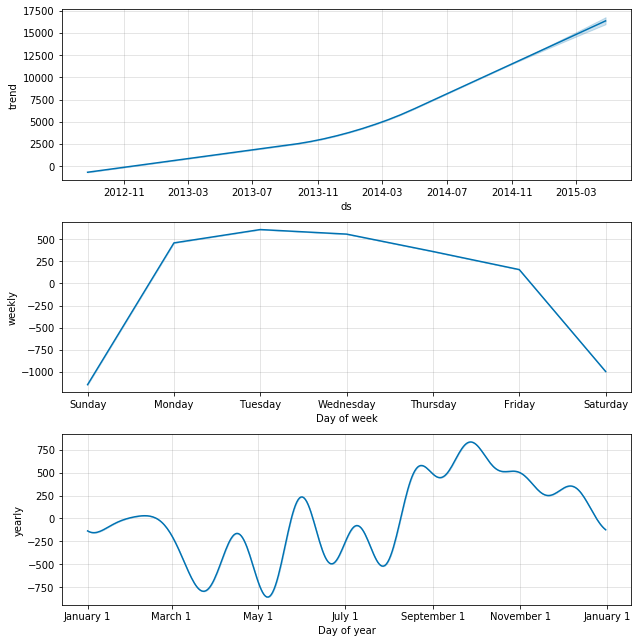

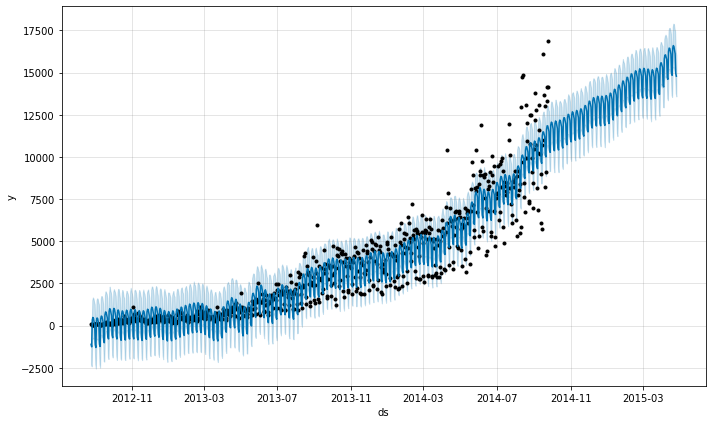

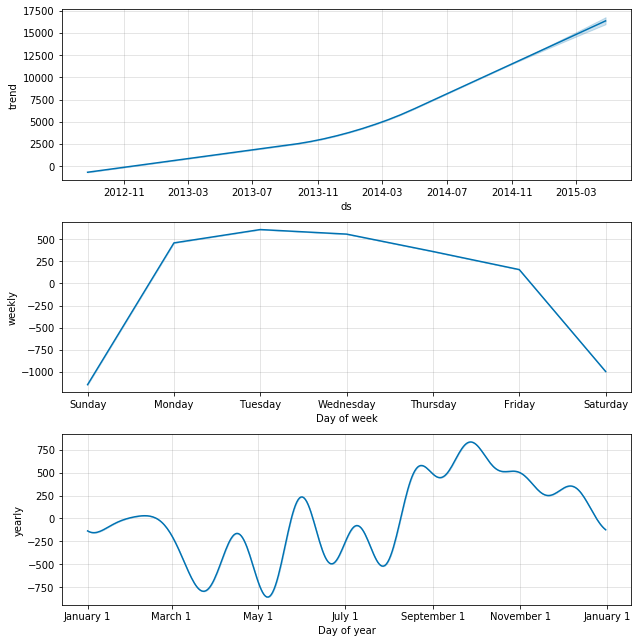

In [1]:
import pandas as pd

# 数据加载
train = pd.read_csv('./train.csv')
# print(train.head())
# 转化为pandas日期格式
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Datetime
train.drop(['ID', 'Datetime'], axis=1, inplace=True)
#print(train.head())
# 按照天进行采样
daily_train = train.resample('D').sum()
#print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop('Count', axis=1, inplace=True)
#print(daily_train.head())

from fbprophet import Prophet
# 拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1) 
# 训练
m.fit(daily_train)
# 建立未来7个月（213天）数据框
future = m.make_future_dataframe(periods=213)
# 预测未来7个月走势
forecast = m.predict(future)
print(forecast)

# 画图输出
m.plot(forecast)
# 查看各个成分
m.plot_components(forecast)